# AIM0404D2203 Lab 2 Topic Modelling (Gensim)
---
<br>
<div style="font-size:20px;color:green;text-align:center"><strong>Dataset Dokumen Berita (Gensim) </strong></div>
<br>
<img align=center src= "https://www.researchgate.net/publication/331669603/figure/fig1/AS:735488403070977@1552365508288/The-flow-of-LDA-Retrieved-from-https-toolboxkuriocoid-topic-modeling-696d7ba2592f.png">

<h1>Penjelasan Hands On</h1>

Pada pertemuan ini, kita akan belajar Topic Modeling menggunakan algoritme LDA (Latent Dirichlet Allocation). Kasus yang akan kita selesaikan yaitu terkait dokumen berita. Kita akan mengekstrak dokumen berita tersebut untuk mendapatkan topik-topik penting yang ada di dalamnya.

Proses menyelesaikan masalah di atas menggunakan pipeline pada Gambar di bawah ini:

1. Data collection 
2. Pre-processing
3. Feature Extraction
4. Menentukan Nilai K terbaik
5. Topic Modeling menggunakan LDA
6. Mencari kesimpulan terhadap topik yang terbentuk

<div><h3 style="font-size:30px;color:black;text-align:center"><strong>Topic Modeling Pipeline</strong> </h3></div>
<img align=center src= "https://undangmi.com/wp-content/uploads/2022/09/LDA-pipeline.png">

# 01 Data Acquisition

In [ ]:
#Download dataset di bawah ini
#!wget https://docs.google.com/spreadsheets/d/180ghjRmSRcR2iRVxBwZtVuhe7UumRcyD/edit?usp=sharing&ouid=117844591790417079121&rtpof=true&sd=true

In [1]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [38]:
#reading the dataset
data= pd.read_csv('data_omnibuslaw.csv')
data.head(3)

,Text
0,Yukkk ah bersama Omnibus Law kita ikutan menol...
1,Yuk kita sukseskan RUU Omnibus Law untuk Indon...
2,yuk kita dukung #OmnibusLaw


# 02 Text Preprocessing

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nycht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nycht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
#preprocessing 
def removeStopword(str):
    #stop_words = stopwords.words('english')
    # get stopword indonesia
    stop_words  = stopwords.words('indonesian')
    stop_words.extend(["Yuk","detikers"])

    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)#remove sentence which contains only one word

def removeSentence(str): 
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''
    
    return str

def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
       
    return str

def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)
    
    return str

<>:28: DeprecationWarning: invalid escape sequence '\S'
<>:34: DeprecationWarning: invalid escape sequence '\s'
<>:28: DeprecationWarning: invalid escape sequence '\S'
<>:34: DeprecationWarning: invalid escape sequence '\s'
C:\Users\Nycht\AppData\Local\Temp\ipykernel_26732\3022648839.py:28: DeprecationWarning: invalid escape sequence '\S'
  str = re.sub("\S*\d\S*", "", str).strip()
C:\Users\Nycht\AppData\Local\Temp\ipykernel_26732\3022648839.py:34: DeprecationWarning: invalid escape sequence '\s'
  str = re.sub('[\s]+', ' ', str)


In [39]:
# !pip install swifter 
# Install swifter. digunakan untuk meningkatkan kecepatan proses pandas

import swifter

In [40]:
%%time
data['clean_article'] = data['Text'].swifter.apply(preprocessing)

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

CPU times: total: 766 ms
Wall time: 3.84 s


In [43]:
data['token'] = [nltk.word_tokenize(i) for i in data.clean_article] #tokenize string

In [45]:
data

,Text,clean_article,token
0,Yukkk ah bersama Omnibus Law kita ikutan menol...,yukkk ah omnibus law ikutan menolak demo gmn k...,"[yukkk, ah, omnibus, law, ikutan, menolak, dem..."
1,Yuk kita sukseskan RUU Omnibus Law untuk Indon...,yuk sukseskan ruu omnibus law indonesia,"[yuk, sukseskan, ruu, omnibus, law, indonesia]"
2,yuk kita dukung #OmnibusLaw,yuk dukung omnibuslaw,"[yuk, dukung, omnibuslaw]"
3,Yuk gaes.. be smart. Bisa kok kritisi Omnibus ...,yuk gaes be smart kritisi omnibus law aksi dem...,"[yuk, gaes, be, smart, kritisi, omnibus, law, ..."
4,Yuk Dukung Omnibus Law,yuk dukung omnibus law,"[yuk, dukung, omnibus, law]"
...,...,...,...
3995,‚ÄúOmnibus Law merupakan cerminan semakin rend...,auomnibus law cerminan rendahnya komitmen peme...,"[auomnibus, law, cerminan, rendahnya, komitmen..."
3996,‚ÄúOmnibus Law harus segera dibatalkan. Pertam...,auomnibus law dibatalkan ruu produk kebijakan ...,"[auomnibus, law, dibatalkan, ruu, produk, kebi..."
3997,‚ÄúDewan Perwakilan Rakyat‚Äù Katanya sebagai ...,audewan perwakilan rakyatau penyalur aspirasi ...,"[audewan, perwakilan, rakyatau, penyalur, aspi..."
3998,".... ,mengancam ruang hidup warga/umat dan men...",mengancam ruang hidup warga umat mengabaikan p...,"[mengancam, ruang, hidup, warga, umat, mengaba..."


In [46]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(data['token'])
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).print(dictionary)

In [47]:
print(dictionary)

Dictionary<1311 unique tokens: ['aja', 'demo', 'dukungobltolakaksidemo', 'gmn', 'ikutan']...>


# 03 Feature Extraction

In [48]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data['token']]
#The function doc2bow converts document (a list of words) into the bag-of-words format

'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''

print(len(doc_term_matrix))

print(doc_term_matrix)

tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model

corpus_tfidf = tfidf[doc_term_matrix]

4000
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1), (11, 1)], [(11, 1), (12, 1)], [(1, 2), (2, 1), (11, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2)], [(11, 1), (12, 1)], [(11, 1), (12, 1)], [(14, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(10, 1), (27, 1)], [(28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(24, 1), (36, 1)], [(10, 1), (28, 1), (37, 1), (38, 1), (39, 5), (40, 1), (41, 1)], [(30, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(18, 1), (23, 2), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2)], [(2, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)], [(12, 1)], [(10, 1), (44, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(47, 1), (52, 1), (54, 1), (67, 1), (68, 1), (69, 1), (70, 1)], [(52, 1), (70, 1)], [(71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(74, 1), (75, 1), (76, 1), (77, 1)], [(28, 1), (42

# 04 Coherence Score
Menentukan jumlah k (topik) terbaik pada LDA

In [49]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

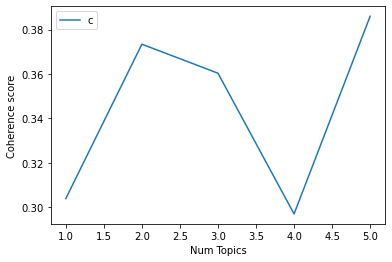

In [50]:
start=1
limit=6
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=data['token'], limit=limit, start=start, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [51]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.303797
Num Topics = 2  has Coherence Value of 0.373409
Num Topics = 3  has Coherence Value of 0.360338
Num Topics = 4  has Coherence Value of 0.296898
Num Topics = 5  has Coherence Value of 0.386016


# 05 LDA Model

In [52]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=4) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    print('\n')

Topic: 0 Word: 0.016*"dukung" + 0.015*"menolak" + 0.014*"gagalkanomnibuslaw" + 0.012*"atasiviruscabutomnibus" + 0.011*"gedung" + 0.010*"cipta" + 0.009*"ekonomi" + 0.009*"ruuciptakerja" + 0.009*"bergerak" + 0.008*"umkm"


Topic: 1 Word: 0.022*"gagalkanomnibuslaw" + 0.022*"gagalkan" + 0.015*"rakyat" + 0.011*"dpr" + 0.011*"yg" + 0.010*"ri" + 0.008*"tolak" + 0.007*"aksi" + 0.007*"cipta" + 0.007*"demo"


Topic: 2 Word: 0.025*"tolak" + 0.025*"tolakomnibuslaw" + 0.017*"atasiviruscabutomnibus" + 0.014*"mahasiswa" + 0.012*"aksi" + 0.012*"waspadaiomnibuslaw" + 0.011*"pandemi" + 0.010*"buruh" + 0.008*"dpr" + 0.008*"turun"


Topic: 3 Word: 0.019*"tolak" + 0.018*"hip" + 0.013*"cipta" + 0.010*"yg" + 0.010*"rakyat" + 0.010*"dpr" + 0.009*"massa" + 0.008*"pks" + 0.008*"disahkan" + 0.007*"indonesia"




Berdasarkan topik yang ditemukan di atas, kita bisa menyimpulkan bahwa topik 0 membahas terkait dokumen berita terkini

# 06 Topic Modeling Visualization

In [53]:
# !pip install pyLDAvis